In [126]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [127]:
# define a state
class BMIState(TypedDict):
    height: float
    weight: float
    bmi : float
    category: str 

In [128]:
# fuctions for the graph
def bmi_calculator(state: BMIState) -> BMIState:
    # print(type(state))
    height = state['height']
    weight = state['weight']
    state['bmi'] = round(weight/(height**2), 2)
    return state

# print(bmi_calculator(BMIState))
def lable_bmi(state: BMIState) -> BMIState:
    bmi = float(state['bmi'])
    print(type(state['bmi']))
    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
    return state

In [129]:
# Define the graph
graph = StateGraph(BMIState)

# add nodes to the graph
graph.add_node('calculate_bmi', bmi_calculator)
graph.add_node('lable_bmi', lable_bmi)

# add edges to the graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'lable_bmi')
graph.add_edge('lable_bmi', END)

# compile the graph
workflow = graph.compile()

In [130]:
# execute the graph
intial_state = {
    "height": 3,
    "weight": 80,
    "bmi": 20
}
final_state = workflow.invoke(intial_state)

<class 'float'>


In [131]:
final_state

{'height': 3, 'weight': 80, 'bmi': 8.89, 'category': 'Underweight'}

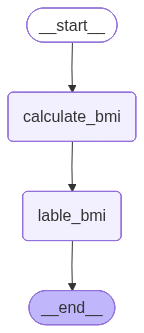

In [132]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())